In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from pandas_profiling import ProfileReport
import os
import sys
import unicodedata
import re
import geopandas as gpd
import chardet
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",100)
%matplotlib inline

In [2]:
#Verificar la codificación del texto dentro del archivo de datos
with open('../data/practica_1/practica_1.csv') as file:
    print(file)
file.close()
del file

<_io.TextIOWrapper name='../data/practica_1/practica_1.csv' mode='r' encoding='UTF-8'>


In [3]:
df = pd.read_csv("../data/practica_1/practica_1.csv", encoding='utf-8', sep=',', low_memory=False)

## Exploración básica

In [4]:
print(f"Ocupando: {df.size} bytes")

Ocupando: 20148752 bytes


In [5]:
df.memory_usage()

Index                       128
id                      6199616
ao_hechos               6199616
mes_hechos              6199616
fecha_hechos            6199616
delito                  6199616
categoria_delito        6199616
fiscalia                6199616
agencia                 6199616
unidad_investigacion    6199616
colonia_hechos          6199616
alcaldia_hechos         6199616
fecha_inicio            6199616
mes_inicio              6199616
ao_inicio               6199616
calle_hechos            6199616
calle_hechos2           6199616
longitud                6199616
latitud                 6199616
geopoint                6199616
Unnamed: 19             6199616
Unnamed: 20             6199616
Unnamed: 21             6199616
Unnamed: 22             6199616
Unnamed: 23             6199616
Unnamed: 24             6199616
Unnamed: 25             6199616
dtype: int64

In [6]:
df.shape

(774952, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774952 entries, 0 to 774951
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    774952 non-null  int64  
 1   ao_hechos             774952 non-null  object 
 2   mes_hechos            774952 non-null  object 
 3   fecha_hechos          774952 non-null  object 
 4   delito                774952 non-null  object 
 5   categoria_delito      774952 non-null  object 
 6   fiscalia              774952 non-null  object 
 7   agencia               774952 non-null  object 
 8   unidad_investigacion  774952 non-null  object 
 9   colonia_hechos        774952 non-null  object 
 10  alcaldia_hechos       774952 non-null  object 
 11  fecha_inicio          774952 non-null  object 
 12  mes_inicio            774952 non-null  object 
 13  ao_inicio             774952 non-null  int64  
 14  calle_hechos          774952 non-null  object 
 15  

In [8]:
##perfil = ProfileReport(df)
##perfil.to_file(output_file='../data/practica_1/practica_1_profile.html')

In [9]:
# Obtener en una lista el nombre de todas las columnas para facilitar la manipulación de las mismas
columnas = list(df.columns)
columnas

['id',
 'ao_hechos',
 'mes_hechos',
 'fecha_hechos',
 'delito',
 'categoria_delito',
 'fiscalia',
 'agencia',
 'unidad_investigacion',
 'colonia_hechos',
 'alcaldia_hechos',
 'fecha_inicio',
 'mes_inicio',
 'ao_inicio',
 'calle_hechos',
 'calle_hechos2',
 'longitud',
 'latitud',
 'geopoint',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25']

In [10]:
df.head()

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,0,2016,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.1035269999999,19.481076,"19.4810759998,-99.103527",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,INVESTIGACIÃN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÃN SECCIÃN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.1060723828598,19.395398,"19.3953976727,-99.1060723829",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2015,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.0558869999999,19.322458,"19.3224579998,-99.055887",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2018,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÃN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.0427862525713,19.319141,"19.3191405147,-99.0427862526",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2018,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.1115626681669,19.386594,"19.3865939284,-99.1115626682",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.tail()

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
774947,808866,2018,Julio,2018-07-09 22:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,INVESTIGACIÃN EN MIGUEL HIDALGO,MH-1,UI-1SD,ANAHUAC,MIGUEL HIDALGO,2018-07-10 18:24:33,Julio,2018,LAGO ALBERTO,LAGO ITZEO,-99.1820184667178,19.439418,"19.439418014,-99.1820184667",NaN,NaN,NaN,NaN,NaN,NaN,NaN
774948,808867,2018,Julio,2018-07-29 05:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MILPA ALTA,MIL-2,UI-1CD,SANTA CRUZ XOCHITEPEC,XOCHIMILCO,2018-07-29 12:37:27,Julio,2018,CALLEJON MORELOS,NaN,-99.1347381,19.254935,"19.2549354998,-99.1347381",NaN,NaN,NaN,NaN,NaN,NaN,NaN
774949,808868,2019,Febrero,2019-02-14 19:00:00,LESIONES INTENCIONALES POR ARMA DE FUEGO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,INVESTIGACIÃN EN MIGUEL HIDALGO,H1,UI-1SD,INDUSTRIAL,GUSTAVO A MADERO,2019-02-15 12:50:00,Febrero,2019,CALZ. DE LOS MISTERIOS,NaN,-99.1229431996188,19.473867,"19.473866796,-99.1229431996",NaN,NaN,NaN,NaN,NaN,NaN,NaN
774950,808869,2019,Febrero,2019-02-15 10:00:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AZCAPOTZALCO,AZ-4,UI-1SD,COSMOPOLITA,AZCAPOTZALCO,2019-02-15 13:04:00,Febrero,2019,CERDEÃA,NaN,-99.1633840419583,19.473593,"19.4735930736,-99.163384042",NaN,NaN,NaN,NaN,NaN,NaN,NaN
774951,808870,2017,Abril,2017-04-01 10:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AGENCIAS DE ATENCIÃN ESPECI...,AER,UI-1SD,AEROPUERTO INTERNACIONAL BENITO JUÃREZ,VENUSTIANO CARRANZA,2017-05-26 17:04:07,Mayo,2017,CAP. AVIADOR CARLOS LEON,NaN,-99.0839742938377,19.435153,"19.4351530369,-99.0839742938",NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

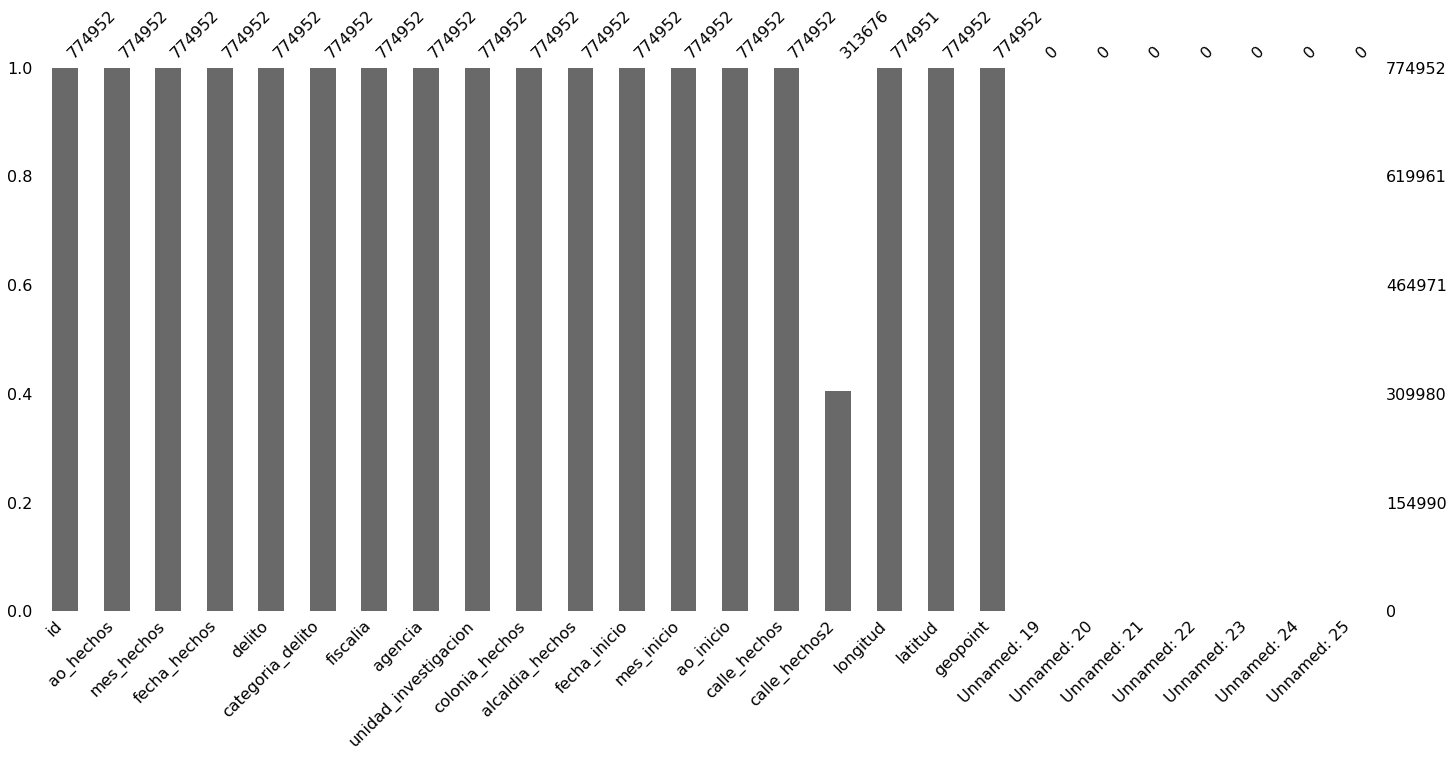

In [12]:
msno.bar(df)

In [13]:
#Verificar que los los valores de la variable 'id' no estén duplicados
len(df['id'])-len(df['id'].drop_duplicates())

0

In [14]:
# Las columnas 'Unnamed: X' están por completo vacías y no representan absolutamente nada, por lo que se eliminan sin ningún miramiento.
df.drop(columnas[-7:], axis=1, inplace=True)
# df.dropna(how='all', inplace=True)

# La columna 'id' tampoco aporta nada y pandas añade una serie como índice, por lo tanto también puede eliminarse
df.drop('id', axis=1, inplace=True)
df.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.1035269999999,19.481076,"19.4810759998,-99.103527"
1,2017,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,INVESTIGACIÃN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÃN SECCIÃN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.1060723828598,19.395398,"19.3953976727,-99.1060723829"
2,2015,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.0558869999999,19.322458,"19.3224579998,-99.055887"
3,2018,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÃN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.0427862525713,19.319141,"19.3191405147,-99.0427862526"
4,2018,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.1115626681669,19.386594,"19.3865939284,-99.1115626682"


## Etiquetado de variables

In [15]:
# Verificar de qué tipo de dato son las variables dentro del dataframe
df.dtypes

ao_hechos                object
mes_hechos               object
fecha_hechos             object
delito                   object
categoria_delito         object
fiscalia                 object
agencia                  object
unidad_investigacion     object
colonia_hechos           object
alcaldia_hechos          object
fecha_inicio             object
mes_inicio               object
ao_inicio                 int64
calle_hechos             object
calle_hechos2            object
longitud                 object
latitud                 float64
geopoint                 object
dtype: object

In [16]:
df.select_dtypes(['int64', 'float64']).sample(5)

,ao_inicio,latitud
579089,2018,19.470327
621072,2019,19.202438
392013,2016,19.450170
623601,2019,19.419965
554524,2016,19.400715


In [17]:
df.select_dtypes(exclude=['int64', 'float64']).sample(2)

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,calle_hechos,calle_hechos2,longitud,geopoint
109077,2018,Julio,2018-07-28 10:15:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AZCAPOTZALCO,AZ-2,UI-3CD,NEXTENGO,AZCAPOTZALCO,2018-07-28 10:58:29,Julio,NEXTENGO,FERROCARRILES NACIONALES,-99.1891889013709,"19.4740403085,-99.1891889014"
324834,2016,Junio,2016-06-20 04:10:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN CUAUHTEMOC,CUH-6,UI-3SD,CENTRO,CUAUHTEMOC,2016-10-18 11:35:05,Octubre,AV. 5 DE MAYO,NaN,-99.1403217215971,"19.4347363131,-99.1403217216"


In [18]:
df.head(2)

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.1035269999999,19.481076,"19.4810759998,-99.103527"
1,2017,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,INVESTIGACIÃN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÃN SECCIÃN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.1060723828598,19.395398,"19.3953976727,-99.1060723829"


In [19]:
# Las variables 'ao_inicio' y 'ao_hechos' son de tipo numeric, y aunque representan años, las tomaré por numércias
# Para facilitar el filtrado de información a través de estas mismas
vars_c = ['ao_inicio', 'ao_hechos']

# Las variables relacionadas con el mes son de tipo texto, sin embargo se pueden tomar por fechas.
vars_d = ['mes_hechos', 'fecha_hechos', 'fecha_inicio', 'mes_inicio']

vars_v = ['delito', 'categoria_delito']

vars_t = ['fiscalia', 'agencia', 'unidad_investigacion', 'colonia_hechos', 'alcaldia_hechos',
          'calle_hechos', 'calle_hechos2', ]

vars_g = ['latitud', 'longitud', 'geopoint']

In [20]:
df.rename(columns=dict(zip(vars_c, ('c_' + x for x in vars_c))), inplace=True)
df.rename(columns=dict(zip(vars_d, ('d_' + x for x in vars_d))), inplace=True)
df.rename(columns=dict(zip(vars_v, ('v_' + x for x in vars_v))), inplace=True)
df.rename(columns=dict(zip(vars_t, ('t_' + x for x in vars_t))), inplace=True)
df.rename(columns=dict(zip(vars_g, ('g_' + x for x in vars_g))), inplace=True)

In [21]:
df.head(1)

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_unidad_investigacion,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint
0,2016,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.1035269999999,19.481076,"19.4810759998,-99.103527"


Uno de los pasos solicitados en la práctica es filtrar los delitos por año, ese paso puede reducir la cantidad de datos a procesar, por lo que es el paso a seguir antes de realzoar la limpieza de texto y las distintas imputaciones

In [22]:
# Verificar si no existen datos distintos dentro de la variable 'c_ao_inicio' para filtrar por el año
df['c_ao_hechos'].unique()

array(['2016', '2017', '2015', '2018', '2014', '2012', '-2017', '-2016',
       '1258', '2013', '2007', '2011', '2010', '2058', '2006', '1978',
       '2023', '2002', '2009', '235', '2019', '2003', '2000', '2008',
       '1990', '2005', '1985', '2001', '2004', '1997', 'Febrero', '1993',
       '1996', '1987', '1989', '1992', '1969', '1998', '1984', '1971',
       '1956', '1991', '1995', '1980', '1974', '1954', '1983', '1994',
       '1972', '1981', '1977', '1999', '1960', '1975', '1965', '1962',
       '1970', '1942', '1930', '1964', '1973', '1966', '1955', '1958',
       '-215', '1800', '19000', '321', 'Junio', '1986', '1976', '1988',
       '1982', '1915', '1957', '1906'], dtype=object)

In [23]:
df['c_ao_hechos'].isna().sum()

0

In [24]:
df['c_ao_hechos'].value_counts()

2018       239234
2017       215773
2016       186038
2019       109437
2015        14608
2014         3540
2013         1711
2012         1121
2011          756
2010          614
2007          443
2009          326
2008          309
2006          200
2001          140
2005          123
2004          102
2003           69
2000           49
2002           43
1998           27
1997           24
1999           22
1996           18
1992           17
1989           16
1993           16
1990           15
1995           14
1994           14
1987           12
1984           11
1991           10
-215           10
1983           10
1985            6
1972            5
1981            5
1986            4
1982            3
1988            3
1980            3
1975            3
1976            3
1969            3
1970            2
1964            2
-2017           2
1966            2
-2016           2
1955            2
1974            2
1956            2
1971            2
1978            2
1915      

In [25]:
def des_significar(x):
    if x.isdigit():
        return True
    elif x.isalpha():
        if x[0] == '-':
            return True
        else:
            return False
    else:
        return False

In [26]:
df = df[df['c_ao_hechos'].map(des_significar)]

In [27]:
def positivizar(x):
    if int(x) < 0:
        return int(x * -1)
    else:
        return int(x)

In [28]:
df['c_ao_hechos'] = df['c_ao_hechos'].map(positivizar)

In [29]:
df['c_ao_hechos'].isna().sum()

0

In [30]:
df['c_ao_hechos'].unique()

array([ 2016,  2017,  2015,  2018,  2014,  2012,  1258,  2013,  2007,
        2011,  2010,  2058,  2006,  1978,  2023,  2002,  2009,   235,
        2019,  2003,  2000,  2008,  1990,  2005,  1985,  2001,  2004,
        1997,  1993,  1996,  1987,  1989,  1992,  1969,  1998,  1984,
        1971,  1956,  1991,  1995,  1980,  1974,  1954,  1983,  1994,
        1972,  1981,  1977,  1999,  1960,  1975,  1965,  1962,  1970,
        1942,  1930,  1964,  1973,  1966,  1955,  1958,  1800, 19000,
         321,  1986,  1976,  1988,  1982,  1915,  1957,  1906])

In [31]:
df = df[df['c_ao_hechos'] > 2013]

In [32]:
df = df[df['c_ao_hechos'] <= 2018]

In [33]:
df['c_ao_hechos'].unique()

array([2016, 2017, 2015, 2018, 2014])

In [34]:
df.shape
# (774952, 26)

(659193, 18)

In [35]:
# Porcentaje de datos restantes tras el filtrado
int((659193/774952) * 100)

85

## Limpieza de variables categóricas y de texto

In [36]:
def limpia_texto(texto):
    t = unicodedata.normalize('NFC', texto).encode('latin1', 'replace').decode('utf8', 'replace')
    return ' '.join(t.lstrip().strip().split()).lower()

In [37]:
#print(limpia_texto(s))

In [38]:
df.head(1)

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_unidad_investigacion,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint
0,2016,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.1035269999999,19.481076,"19.4810759998,-99.103527"


In [39]:
# Limpieza de variables categóricas
df['v_delito'] = df['v_delito'].map(lambda x:limpia_texto(x).replace('\n', ''))

In [40]:
df['v_delito'].unique()

array(['lesiones culposas',
       'robo a transeunte en via publica con violencia', 'fraude',
       'robo a repartidor con violencia',
       'robo a transeunte de celular con violencia', 'robo de dinero',
       'lesiones intencionales', 'abuso de autoridad',
       'daño en propiedad ajena culposa por tránsito vehicular a automovil',
       'robo de vehiculo de servicio público sin violencia',
       'delitos ambientales', 'robo de objetos',
       'daño en propiedad ajena intencional a automovil',
       'violencia familiar', 'narcomenudeo posesion simple',
       'robo de accesorios de auto', 'homicidio por arma de fuego',
       'robo a negocio sin violencia',
       'robo de vehiculo de servicio particular con violencia',
       'lesiones culposas por transito vehicular en colision',
       'abandono de persona', 'daño en propiedad ajena culposa',
       'amenazas',
       'falsificacion de titulos al portador y documentos de credito publico',
       'lesiones intencionales por

In [41]:
len(list(df['v_delito'].unique()))

271

In [42]:
df['v_delito'].map(lambda x:x[0].isdigit()).value_counts()

False    659189
True          4
Name: v_delito, dtype: int64

In [43]:
#se pueden quitar los 4 registros que son fecha
df = df[df['v_delito'].map(lambda x: not x[0].isdigit())]

In [44]:
df['v_categoria_delito'] = df['v_categoria_delito'].map(lambda x:limpia_texto(x).replace('\n', ''))

In [45]:
df['v_categoria_delito'].unique()

array(['delito de bajo impacto',
       'robo a transeunte en vía pública con y sin violencia',
       'robo a repartidor con y sin violencia',
       'robo de vehículo con y sin violencia', 'homicidio doloso',
       'hecho no delictivo', 'robo a negocio con violencia',
       'lesiones dolosas por disparo de arma de fuego',
       'robo a cuentahabiente saliendo del cajero con violencia',
       'robo a pasajero a bordo de microbus con y sin violencia',
       'robo a pasajero a bordo del metro con y sin violencia',
       'robo a pasajero a bordo de taxi con violencia',
       'robo a casa habitación con violencia', 'violación',
       'robo a transportista con y sin violencia', 'secuestro'],
      dtype=object)

In [46]:
df['v_categoria_delito'].value_counts(1)

delito de bajo impacto                                     0.796022
hecho no delictivo                                         0.067491
robo de vehículo con y sin violencia                       0.052055
robo a transeunte en vía pública con y sin violencia       0.037781
robo a negocio con violencia                               0.013495
robo a repartidor con y sin violencia                      0.008372
robo a pasajero a bordo del metro con y sin violencia      0.005440
homicidio doloso                                           0.004692
lesiones dolosas por disparo de arma de fuego              0.003885
robo a pasajero a bordo de microbus con y sin violencia    0.003325
robo a casa habitación con violencia                       0.002204
violación                                                  0.002174
robo a cuentahabiente saliendo del cajero con violencia    0.001652
robo a pasajero a bordo de taxi con violencia              0.000803
robo a transportista con y sin violencia        

In [47]:
# Limpieza variables de texto
df.head(1)

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_unidad_investigacion,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint
0,2016,Enero,2016-01-05 17:00:00,lesiones culposas,delito de bajo impacto,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.1035269999999,19.481076,"19.4810759998,-99.103527"


In [48]:
df['t_fiscalia'] = df['t_fiscalia'].map(lambda x: limpia_texto(x).replace('\n','').title())

In [49]:
df['t_fiscalia'].value_counts()

Investigación En Cuauhtemoc                                                             85097
Investigación En Iztapalapa                                                             81987
Investigación En Benito Juárez                                                          55367
Investigación En Gustavo A. Madero                                                      54582
Investigación En Coyoacán                                                               39757
Investigación En Miguel Hidalgo                                                         38625
Investigación En Álvaro Obregón                                                         37492
Investigación En Tlalpan                                                                34374
Investigación En Venustiano Carranza                                                    32150
Investigación En Azcapotzalco                                                           29936
Investigación En Iztacalco                                  

In [50]:
# Existe un registro que no corresponde a la fiscalía, se puede eliminar el registro después de reviar el contenido
df.loc[df['t_fiscalia'] == 'Tlp-1']

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_unidad_investigacion,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint
11851,2018,Diciembre,jueves| 13 de diciembre de 2018| 9:00:00 (),robo a negocio sin violencia,delito de bajo impacto,Tlp-1,TLP-1,UI-3CD,CHIMILLI,TLALPAN,2019-02-23 09:20:00,Febrero,2019,PICACHO AJUSCO,NaN,-99.2183342152914,19.268464,"19.2684642671,-99.2183342153"


In [51]:
df.drop(df.loc[df['t_fiscalia'] == 'Tlp-1'].index, inplace=True)

In [52]:
#Normalización de la variable Fiscalía
def normaliza_fiscalia(x):
    """
    Justificación:
        Se agrupan según su función, y únicamente tienen sentido nemoténico estas dos clasificaciones
    """
    if x.split()[0] == 'Investigación':
        return 'Fiscalías de Investigación'
    elif x.split()[0] == 'Juzgados':
        return 'Juzgados'
    else:
        return 'Otros'

In [53]:
df['v_fiscalia_n'] = df['t_fiscalia'].map(normaliza_fiscalia)

In [54]:
df.head(5)

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_unidad_investigacion,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n
0,2016,Enero,2016-01-05 17:00:00,lesiones culposas,delito de bajo impacto,Investigación En Gustavo A. Madero,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.1035269999999,19.481076,"19.4810759998,-99.103527",Fiscalías de Investigación
1,2017,Noviembre,2017-11-01 16:40:00,robo a transeunte en via publica con violencia,robo a transeunte en vía pública con y sin vio...,Investigación En Iztacalco,IZC-2,UI-1SD,GABRIEL RAMOS MILLÃN SECCIÃN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.1060723828598,19.395398,"19.3953976727,-99.1060723829",Fiscalías de Investigación
2,2015,Diciembre,2015-12-30 20:00:00,fraude,delito de bajo impacto,Investigación En Iztapalapa,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.0558869999999,19.322458,"19.3224579998,-99.055887",Fiscalías de Investigación
3,2018,Mayo,2018-05-16 16:00:00,robo a repartidor con violencia,robo a repartidor con y sin violencia,Investigación En Iztapalapa,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.0427862525713,19.319141,"19.3191405147,-99.0427862526",Fiscalías de Investigación
4,2018,Mayo,2018-05-21 20:40:00,robo a transeunte de celular con violencia,delito de bajo impacto,Investigación En Cuauhtemoc,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.1115626681669,19.386594,"19.3865939284,-99.1115626682",Fiscalías de Investigación


In [55]:
df['t_agencia'] = df['t_agencia'].map(lambda x:limpia_texto(x).replace('\n', '').upper())

In [56]:
df['t_agencia'].value_counts()

AZ-1         24920
CUH-2        24278
BJ-3         20037
BJ-1         19975
IZP-6        18046
             ...  
URI-GAM-4        1
HOM-E            1
AZ-3             1
URI-GAM-3        1
URI-VC-3         1
Name: t_agencia, Length: 154, dtype: int64

In [57]:
df['t_unidad_investigacion'] = df['t_unidad_investigacion'].map(lambda x:limpia_texto(x).replace('\n', '').upper())
df['t_unidad_investigacion'].value_counts()

UI-1SD                            183084
UI-2SD                            101238
UI-1CD                             93458
UI-3SD                             83532
UI-3CD                             82969
UI-2CD                             80842
UI-4SD                              2944
3 CON DETENIDO 3 C/D                2930
2 CON DETENIDO 2 C/D                2715
1 CON DETENIDO 1 C/D                2433
2 S/D                               2219
1 S/D                               1922
FDS-6-02                            1118
4 SIN DETENIDO 4 S/D                1082
FDS-6-01                             959
FDS-5-01                             878
FDS-6-03                             874
3 S/D                                854
UI-7SD                               661
FDS-1-03                             649
FDS-5-02                             617
FDS-5-03                             606
UI-5SD                               554
FDS-2-02                             544
FDS-2-01        

In [58]:
# Unidad de investigación es una columna muy 'sucia' y no aporta explicabilidad, por lo anterior se puede eliminar
df.drop('t_unidad_investigacion', axis=1, inplace=True)

In [59]:
df['t_colonia_hechos'] = df['t_colonia_hechos'].map(lambda x:limpia_texto(x).replace('\n', '').title())
df['t_colonia_hechos'].value_counts(1)

Centro                                 0.037373
Doctores                               0.020908
Del Valle Centro                       0.016523
Roma Norte                             0.013684
Narvarte                               0.012203
                                         ...   
Lázaro Tata                            0.000002
Belen De Las Flores Seccion Turbina    0.000002
Milpa Los Cerros                       0.000002
Malvinas Primero                       0.000002
Campo De Tiro Los Gamitos              0.000002
Name: t_colonia_hechos, Length: 1625, dtype: float64

In [60]:
df[df['t_colonia_hechos'].map(lambda x:x[0].isdigit())]

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n
37,2018,Mayo,2018-05-21 21:30:00,amenazas,delito de bajo impacto,Investigación En Iztapalapa,IZP-8,2Da Ampliacion Paraje San Juan,IZTAPALAPA,2018-05-23 01:00:51,Mayo,2018,IZTACCIHUATL,NaN,-99.0732981302126,19.338068,"19.3380683242,-99.0732981302",Fiscalías de Investigación
424,2018,Enero,2018-01-23 09:40:00,robo a pasajero / conductor de vehiculo con vi...,delito de bajo impacto,Investigación En Álvaro Obregón,AO-1,2A Ampliación Jalalpa Tepito,ALVARO OBREGON,2018-01-23 13:02:03,Enero,2018,GUSTAVO DIAZ ORDAZ,NaN,-99.2378036893497,19.372443,"19.3724431804,-99.2378036893",Fiscalías de Investigación
505,2018,Enero,2018-01-26 17:40:00,robo de accesorios de auto,delito de bajo impacto,Investigación En Benito Juárez,BJ-1,8 De Agosto,BENITO JUAREZ,2018-01-29 21:07:14,Enero,2018,PRIMERO DE MAYO,CALLE 12,-99.1871724388181,19.389857,"19.3898565003,-99.1871724388",Fiscalías de Investigación
506,2018,Enero,2018-01-29 18:10:00,robo a transeunte de celular con violencia,delito de bajo impacto,Investigación En Álvaro Obregón,AO-3,1A Ampliación Presidentes,ALVARO OBREGON,2018-01-29 21:17:57,Enero,2018,ADOLFO DE LA HUERTA,ADOLFO RUIZ CORTINEZ,-99.2209982009146,19.377353,"19.3773525897,-99.2209982009",Fiscalías de Investigación
516,2018,Enero,2018-01-29 07:30:00,robo de objetos,delito de bajo impacto,Investigación En Iztapalapa,IZP-4,2Da Ampliacion Barrio San Miguel (San Felipe T...,IZTAPALAPA,2018-01-30 11:00:58,Enero,2018,CARRIL,MATAMOROS,-99.0707173810796,19.351002,"19.3510021775,-99.0707173811",Fiscalías de Investigación
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773966,2018,Febrero,2018-02-02 22:30:00,robo de vehiculo de servicio público sin viole...,robo de vehículo con y sin violencia,Investigación En Álvaro Obregón,AO-1,1A Victoria,ALVARO OBREGON,2018-02-05 11:30:02,Febrero,2018,CALLE B,NaN,-99.1964510816859,19.387691,"19.3876913997,-99.1964510817",Fiscalías de Investigación
774134,2017,Diciembre,2017-12-21 12:20:00,denuncia de hechos,hecho no delictivo,Investigación En Venustiano Carranza,VC-2,20 De Noviembre,VENUSTIANO CARRANZA,2018-02-06 16:35:34,Febrero,2018,GRABADOS,NaN,-99.1083507352374,19.444270,"19.4442700152,-99.1083507352",Fiscalías de Investigación
774220,2018,Octubre,2018-10-28 18:20:00,"narcomenudeo posesión con fines de venta, come...",delito de bajo impacto,Investigación Para La Atención Del Delito De N...,ACD,10 De Mayo,VENUSTIANO CARRANZA,2018-10-28 20:19:02,Octubre,2018,AV. ARTILLEROS (EMILIANO ZAPATA),NaN,-99.1161691613068,19.431983,"19.4319833314,-99.1161691613",Fiscalías de Investigación
774564,2018,Diciembre,2018-12-02 16:00:00,robo a negocio sin violencia,delito de bajo impacto,Investigación En Miguel Hidalgo,MH-2,5 De Mayo,MIGUEL HIDALGO,2019-01-08 18:15:52,Enero,2019,LAGO GINEBRA,NaN,-99.2015664,19.447720,"19.4477202,-99.2015664",Fiscalías de Investigación


In [61]:
# Los registros son coherentes con nombres de colonias

In [62]:
df['t_calle_hechos'] = df['t_calle_hechos'].map(lambda x:limpia_texto(x).replace('\n', ''))
df['t_calle_hechos'].value_counts()

eje central lazaro cardenas           3023
calzada de tlalpan                    2948
sin calles del sap                    2655
calzada ignacio zaragoza              2488
av. insurgentes sur                   2284
                                      ... 
primera cda. vasco de quiroga            1
2da cerrada de corceles                  1
cultura y culturas griegas               1
avenida aztecas manzana 60 lote 21       1
bodega d-2 del area de abarrotes         1
Name: t_calle_hechos, Length: 139616, dtype: int64

In [63]:
len(list(df['t_calle_hechos'].unique()))

139616

In [64]:
"""
# Como se vio anteriormente, la columna calle 2 tiene un índice de valores nulos de más de la mitad
# Sin embargo, no se puede sólo descartar porque sí, ya que podemos suponer que si calle y calle dos son diferentes de nulo
# Podemos sopuner que el delito ocurrió en un cruce o esquina
# En este momento se puede pensar que la calle2 puede agregar explicabilidad en un futuro, por lo que se conserva y se llenan los nulos con un NA
"""
df['t_calle_hechos2'] = df['t_calle_hechos'].map(lambda x:limpia_texto(x).replace('\n', ''))
df['t_calle_hechos2'].value_counts()

eje central lazaro cardenas           3023
calzada de tlalpan                    2948
sin calles del sap                    2655
calzada ignacio zaragoza              2488
av. insurgentes sur                   2284
                                      ... 
primera cda. vasco de quiroga            1
2da cerrada de corceles                  1
cultura y culturas griegas               1
avenida aztecas manzana 60 lote 21       1
bodega d-2 del area de abarrotes         1
Name: t_calle_hechos2, Length: 139608, dtype: int64

In [65]:
df['t_calle_hechos'].fillna('N/A', inplace=True)

<AxesSubplot:>

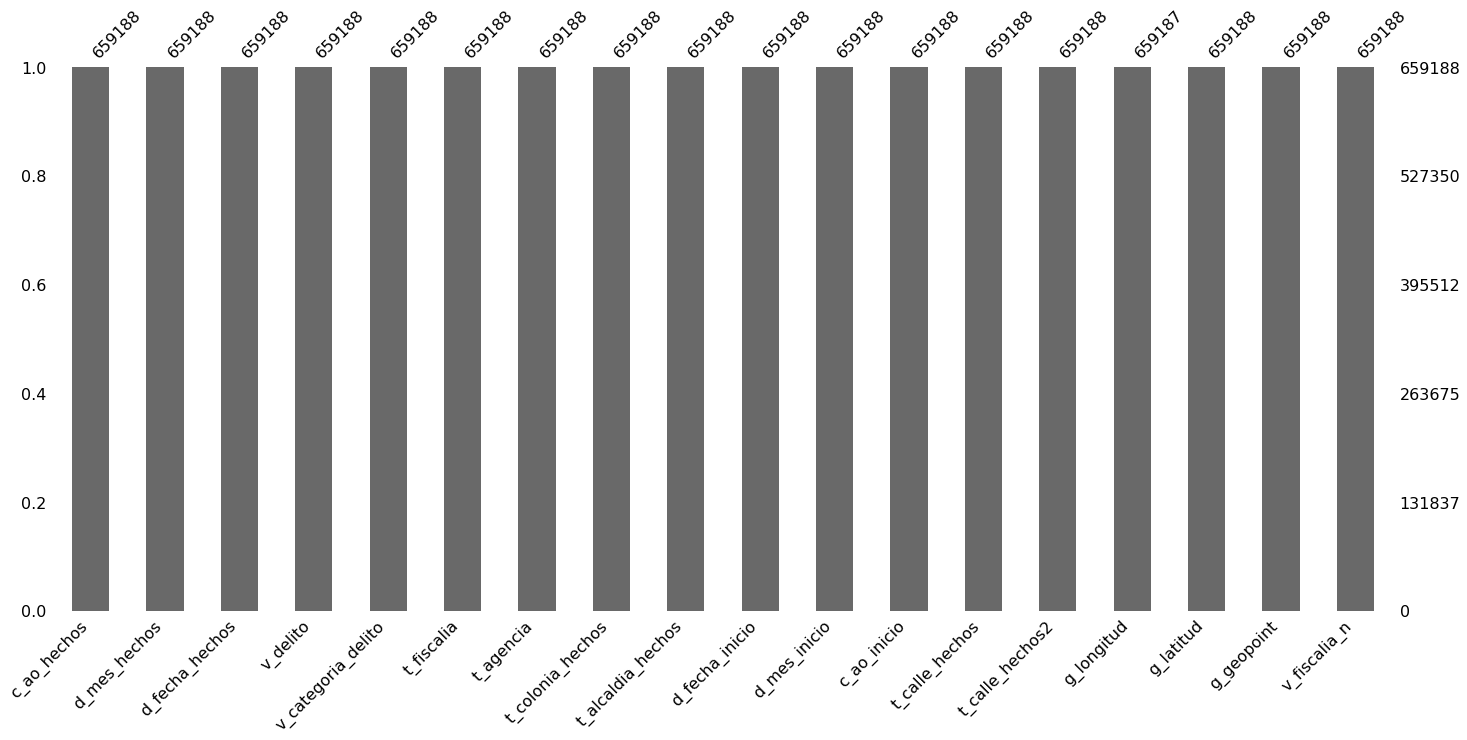

In [66]:
msno.bar(df)

In [67]:
# Limpieza y normalización de Alcaldía
df['t_alcaldia_hechos'] = df['t_alcaldia_hechos'].map(lambda x:limpia_texto(x).replace('\n', '').title())
df['t_alcaldia_hechos'].unique()

array(['Gustavo A Madero', 'Iztacalco', 'Iztapalapa', 'Benito Juarez',
       'Cuauhtemoc', 'La Magdalena Contreras', 'Azcapotzalco',
       'Miguel Hidalgo', 'Venustiano Carranza', 'Alvaro Obregon',
       'Milpa Alta', 'Tlalpan', 'Coyoacan', 'Xochimilco',
       'Cuajimalpa De Morelos', 'Tlahuac'], dtype=object)

In [68]:
alcaldias = {'Zona Centro Poniente': ['Cuauhtemoc', 'Miguel Hidalgo', 'Alvaro Obregon', 'Azcapotzalco', 'Cuajimalpa De Morelos'],
            'Zona Sur': ['Benito Juarez', 'Coyoacan', 'Tlalpan', 'La Magdalena Contreras'],
             'Zona Norte' : ['Gustavo A Madero', 'Venustiano Carranza', 'Iztacalco'],
             'Zona Oriente' : ['Iztapalapa', 'Tlahuac', 'Xochimilco', 'Milpa Alta']
            }

In [69]:
def normaliza_alcaldia(x):
    for i in alcaldias:
        if x in alcaldias[i]:
            return i

In [70]:
df['v_zona_hechos'] = df['t_alcaldia_hechos'].map(normaliza_alcaldia)

In [71]:
df.head(5)

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n,v_zona_hechos
0,2016,Enero,2016-01-05 17:00:00,lesiones culposas,delito de bajo impacto,Investigación En Gustavo A. Madero,GAM-6,Granjas Modernas,Gustavo A Madero,2016-01-05 18:35:37,Enero,2016,san juan de aragon,san juan de aragon,-99.1035269999999,19.481076,"19.4810759998,-99.103527",Fiscalías de Investigación,Zona Norte
1,2017,Noviembre,2017-11-01 16:40:00,robo a transeunte en via publica con violencia,robo a transeunte en vía pública con y sin vio...,Investigación En Iztacalco,IZC-2,Gabriel Ramos Millán Sección Tlacotal,Iztacalco,2017-11-01 16:56:04,Noviembre,2017,sur 117,sur 117,-99.1060723828598,19.395398,"19.3953976727,-99.1060723829",Fiscalías de Investigación,Zona Norte
2,2015,Diciembre,2015-12-30 20:00:00,fraude,delito de bajo impacto,Investigación En Iztapalapa,IZP-8,Consejo Agrarista Mexicano,Iztapalapa,2016-01-05 21:12:42,Enero,2016,cuarta cerrada de fresno,cuarta cerrada de fresno,-99.0558869999999,19.322458,"19.3224579998,-99.055887",Fiscalías de Investigación,Zona Oriente
3,2018,Mayo,2018-05-16 16:00:00,robo a repartidor con violencia,robo a repartidor con y sin violencia,Investigación En Iztapalapa,IZP-9,Desarrollo Urbano Quetzalcoatl,Iztapalapa,2018-05-22 10:44:45,Mayo,2018,tarasco,tarasco,-99.0427862525713,19.319141,"19.3191405147,-99.0427862526",Fiscalías de Investigación,Zona Oriente
4,2018,Mayo,2018-05-21 20:40:00,robo a transeunte de celular con violencia,delito de bajo impacto,Investigación En Cuauhtemoc,CUH-2,Infonavit Iztacalco,Iztacalco,2018-05-22 10:52:18,Mayo,2018,francisco del paso y troncoso,francisco del paso y troncoso,-99.1115626681669,19.386594,"19.3865939284,-99.1115626682",Fiscalías de Investigación,Zona Norte


In [72]:
df['v_delito'].unique()

array(['lesiones culposas',
       'robo a transeunte en via publica con violencia', 'fraude',
       'robo a repartidor con violencia',
       'robo a transeunte de celular con violencia', 'robo de dinero',
       'lesiones intencionales', 'abuso de autoridad',
       'daño en propiedad ajena culposa por tránsito vehicular a automovil',
       'robo de vehiculo de servicio público sin violencia',
       'delitos ambientales', 'robo de objetos',
       'daño en propiedad ajena intencional a automovil',
       'violencia familiar', 'narcomenudeo posesion simple',
       'robo de accesorios de auto', 'homicidio por arma de fuego',
       'robo a negocio sin violencia',
       'robo de vehiculo de servicio particular con violencia',
       'lesiones culposas por transito vehicular en colision',
       'abandono de persona', 'daño en propiedad ajena culposa',
       'amenazas',
       'falsificacion de titulos al portador y documentos de credito publico',
       'lesiones intencionales por

In [73]:
#Normalización variable delito:
def normaliza_delitos(x):
    """
    Justificación:
        La clasificación aquí es por lo punible que es el delito según mi criterio pesonal
    """
    if 'homicidio' in x.lower() or 'feminicio' in x.lower():
        return 'delitos por homicidio'
    elif 'violación' in x.lower() or 'pornografia' in x.lower() or 'sexual' in x.lower() or 'estupro' in x.lower():
        return 'delitos sexuales'
    elif 'robo' in x.lower():
        return 'delitos por robo'
    elif 'libertad' in x.lower() or 'secuestro' in x.lower():
        return 'delitos por secuestro'
    elif 'lesiones' in x.lower():
        return 'delitos por lesiones'
    elif 'ambiente' in x.lower() or 'ambiental' in x.lower() or 'ambientales' in x.lower():
        return 'delitos ambientales'
    else:
        return 'otros delitos'

In [74]:
df['v_delito_n'] = df['v_delito'].map(normaliza_delitos)

In [75]:
df.head(5)

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n,v_zona_hechos,v_delito_n
0,2016,Enero,2016-01-05 17:00:00,lesiones culposas,delito de bajo impacto,Investigación En Gustavo A. Madero,GAM-6,Granjas Modernas,Gustavo A Madero,2016-01-05 18:35:37,Enero,2016,san juan de aragon,san juan de aragon,-99.1035269999999,19.481076,"19.4810759998,-99.103527",Fiscalías de Investigación,Zona Norte,delitos por lesiones
1,2017,Noviembre,2017-11-01 16:40:00,robo a transeunte en via publica con violencia,robo a transeunte en vía pública con y sin vio...,Investigación En Iztacalco,IZC-2,Gabriel Ramos Millán Sección Tlacotal,Iztacalco,2017-11-01 16:56:04,Noviembre,2017,sur 117,sur 117,-99.1060723828598,19.395398,"19.3953976727,-99.1060723829",Fiscalías de Investigación,Zona Norte,delitos por robo
2,2015,Diciembre,2015-12-30 20:00:00,fraude,delito de bajo impacto,Investigación En Iztapalapa,IZP-8,Consejo Agrarista Mexicano,Iztapalapa,2016-01-05 21:12:42,Enero,2016,cuarta cerrada de fresno,cuarta cerrada de fresno,-99.0558869999999,19.322458,"19.3224579998,-99.055887",Fiscalías de Investigación,Zona Oriente,otros delitos
3,2018,Mayo,2018-05-16 16:00:00,robo a repartidor con violencia,robo a repartidor con y sin violencia,Investigación En Iztapalapa,IZP-9,Desarrollo Urbano Quetzalcoatl,Iztapalapa,2018-05-22 10:44:45,Mayo,2018,tarasco,tarasco,-99.0427862525713,19.319141,"19.3191405147,-99.0427862526",Fiscalías de Investigación,Zona Oriente,delitos por robo
4,2018,Mayo,2018-05-21 20:40:00,robo a transeunte de celular con violencia,delito de bajo impacto,Investigación En Cuauhtemoc,CUH-2,Infonavit Iztacalco,Iztacalco,2018-05-22 10:52:18,Mayo,2018,francisco del paso y troncoso,francisco del paso y troncoso,-99.1115626681669,19.386594,"19.3865939284,-99.1115626682",Fiscalías de Investigación,Zona Norte,delitos por robo


In [76]:
df[df.duplicated()] 

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n,v_zona_hechos,v_delito_n


In [77]:
#Verificar consistencia de los años
df[df['c_ao_hechos'] > df['c_ao_inicio']]

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n,v_zona_hechos,v_delito_n


In [78]:
df[df['d_fecha_hechos'].map(lambda x:x[0].isalpha())].shape

(273, 20)

In [79]:
df[df['d_fecha_inicio'].map(lambda x:x[0].isalpha())].shape

(5, 20)

In [80]:
# La cantidad de datos es pequeña, se pueden eliminar esos registros con inconcistencias en el formato de fecha
df.drop(df.loc[df['d_fecha_hechos'].map(lambda x:x[0].isalpha())].index, inplace=True)
df.drop(df.loc[df['d_fecha_inicio'].map(lambda x:x[0].isalpha())].index, inplace=True)

In [81]:
df['d_fecha_hechos'] = pd.to_datetime(df['d_fecha_hechos'])
df['d_fecha_inicio'] = pd.to_datetime(df['d_fecha_inicio'])

In [82]:
#Ahora verificamos la consistencia de las fechas
# Si la fecha inicio es antes de la fecha hechos se considera incosistente y se eliminan los registros en función
# de la cantidad que sean
df[ df['d_fecha_hechos'] > df['d_fecha_inicio'] ].shape

(2848, 20)

In [83]:
df.shape

(658910, 20)

In [84]:
(2848/658910)*100

0.4322289842315339

In [85]:
#El porcentaje es claramente pequeño, por lo que no debe haber problema en eliminar los registros inconsistentes
df.reset_index(drop=True)
df[ df['d_fecha_hechos'] > df['d_fecha_inicio']].head(5)
df.drop(df[ df['d_fecha_hechos'] > df['d_fecha_inicio']].index, inplace=True)

In [86]:
df['d_dia'] = df['d_fecha_hechos'].dt.day_name()
df['d_dia_semana'] = df['d_fecha_hechos'].dt.day_of_week

In [87]:
df.head(3)

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n,v_zona_hechos,v_delito_n,d_dia,d_dia_semana
0,2016,Enero,2016-01-05 17:00:00,lesiones culposas,delito de bajo impacto,Investigación En Gustavo A. Madero,GAM-6,Granjas Modernas,Gustavo A Madero,2016-01-05 18:35:37,Enero,2016,san juan de aragon,san juan de aragon,-99.1035269999999,19.481076,"19.4810759998,-99.103527",Fiscalías de Investigación,Zona Norte,delitos por lesiones,Tuesday,1
1,2017,Noviembre,2017-11-01 16:40:00,robo a transeunte en via publica con violencia,robo a transeunte en vía pública con y sin vio...,Investigación En Iztacalco,IZC-2,Gabriel Ramos Millán Sección Tlacotal,Iztacalco,2017-11-01 16:56:04,Noviembre,2017,sur 117,sur 117,-99.1060723828598,19.395398,"19.3953976727,-99.1060723829",Fiscalías de Investigación,Zona Norte,delitos por robo,Wednesday,2
2,2015,Diciembre,2015-12-30 20:00:00,fraude,delito de bajo impacto,Investigación En Iztapalapa,IZP-8,Consejo Agrarista Mexicano,Iztapalapa,2016-01-05 21:12:42,Enero,2016,cuarta cerrada de fresno,cuarta cerrada de fresno,-99.0558869999999,19.322458,"19.3224579998,-99.055887",Fiscalías de Investigación,Zona Oriente,otros delitos,Wednesday,2


In [88]:
def traducir(x):
    if x == 'Monday':
        return 'Lunes'
    elif x == 'Tuesday':
        return 'Martes'
    elif x == 'Wednesday':
        return 'Miércoles'
    elif x == 'Thursday':
        return 'Jueves'
    elif x == 'Friday':
        return 'Viernes'
    elif x == 'Saturday':
        return "Sábado"
    elif x == 'Sunday':
        return 'Domingo'

In [89]:
df['d_dia'] = df['d_dia'].map(traducir)

In [90]:
def finde(x):
    if x == 'Sábado' or x == 'Domingo':
        return 'si'
    else:
        return 'no'

In [91]:
df['d_es_finde'] = df['d_dia'].map(finde)

In [92]:
df.head(3)

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n,v_zona_hechos,v_delito_n,d_dia,d_dia_semana,d_es_finde
0,2016,Enero,2016-01-05 17:00:00,lesiones culposas,delito de bajo impacto,Investigación En Gustavo A. Madero,GAM-6,Granjas Modernas,Gustavo A Madero,2016-01-05 18:35:37,Enero,2016,san juan de aragon,san juan de aragon,-99.1035269999999,19.481076,"19.4810759998,-99.103527",Fiscalías de Investigación,Zona Norte,delitos por lesiones,Martes,1,no
1,2017,Noviembre,2017-11-01 16:40:00,robo a transeunte en via publica con violencia,robo a transeunte en vía pública con y sin vio...,Investigación En Iztacalco,IZC-2,Gabriel Ramos Millán Sección Tlacotal,Iztacalco,2017-11-01 16:56:04,Noviembre,2017,sur 117,sur 117,-99.1060723828598,19.395398,"19.3953976727,-99.1060723829",Fiscalías de Investigación,Zona Norte,delitos por robo,Miércoles,2,no
2,2015,Diciembre,2015-12-30 20:00:00,fraude,delito de bajo impacto,Investigación En Iztapalapa,IZP-8,Consejo Agrarista Mexicano,Iztapalapa,2016-01-05 21:12:42,Enero,2016,cuarta cerrada de fresno,cuarta cerrada de fresno,-99.0558869999999,19.322458,"19.3224579998,-99.055887",Fiscalías de Investigación,Zona Oriente,otros delitos,Miércoles,2,no


In [93]:
df['mes'] = df['d_fecha_hechos'].dt.month

In [94]:
def cuatrimestre(x):
    if 1 < x <= 4:
        return 'Primer cuatrimestre'
    elif 4 < x <= 8:
        return 'Segundo cuatrimestre'
    else:
        return 'Tercer cuatrimestre'

In [95]:
df['d_cuatrimestre'] = df['mes'].map(cuatrimestre)
df.drop('mes', axis=1, inplace=True)

In [96]:
df.head(3)

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n,v_zona_hechos,v_delito_n,d_dia,d_dia_semana,d_es_finde,d_cuatrimestre
0,2016,Enero,2016-01-05 17:00:00,lesiones culposas,delito de bajo impacto,Investigación En Gustavo A. Madero,GAM-6,Granjas Modernas,Gustavo A Madero,2016-01-05 18:35:37,Enero,2016,san juan de aragon,san juan de aragon,-99.1035269999999,19.481076,"19.4810759998,-99.103527",Fiscalías de Investigación,Zona Norte,delitos por lesiones,Martes,1,no,Tercer cuatrimestre
1,2017,Noviembre,2017-11-01 16:40:00,robo a transeunte en via publica con violencia,robo a transeunte en vía pública con y sin vio...,Investigación En Iztacalco,IZC-2,Gabriel Ramos Millán Sección Tlacotal,Iztacalco,2017-11-01 16:56:04,Noviembre,2017,sur 117,sur 117,-99.1060723828598,19.395398,"19.3953976727,-99.1060723829",Fiscalías de Investigación,Zona Norte,delitos por robo,Miércoles,2,no,Tercer cuatrimestre
2,2015,Diciembre,2015-12-30 20:00:00,fraude,delito de bajo impacto,Investigación En Iztapalapa,IZP-8,Consejo Agrarista Mexicano,Iztapalapa,2016-01-05 21:12:42,Enero,2016,cuarta cerrada de fresno,cuarta cerrada de fresno,-99.0558869999999,19.322458,"19.3224579998,-99.055887",Fiscalías de Investigación,Zona Oriente,otros delitos,Miércoles,2,no,Tercer cuatrimestre


In [97]:
#Verificando los datos de latitus y longitud de la CDMX, según el INEGI, abarca 
#desde 19º 03´ a 19º 36´ de latitud norte y de 98º 57´ a 99º 22´ de longitud oeste
#Filtrando estas coordenadas en el DF
df[df['g_latitud'] < 19.03]

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n,v_zona_hechos,v_delito_n,d_dia,d_dia_semana,d_es_finde,d_cuatrimestre
506060,2017,Enero,2017-01-06 04:45:00,robo de accesorios de auto,delito de bajo impacto,Investigación En Iztapalapa,IZP-6,Lomas De Zaragoza,Iztapalapa,2017-01-06 06:44:51,Enero,2017,corregidora,corregidora,-98.9985978154215,12.000000,"19.3546391307,-98.9985978154",Fiscalías de Investigación,Zona Oriente,delitos por robo,Viernes,4,no,Tercer cuatrimestre
506113,2016,Junio,2016-06-05 16:30:00,tentativa de robo,delito de bajo impacto,Investigación En Gustavo A. Madero,GAM-5,Nueva Atzacoalco,Gustavo A Madero,2016-06-05 21:36:22,Junio,2016,calle 314,calle 314,2005,0.000000,"19.5007203909,-99.0844165732",Fiscalías de Investigación,Zona Norte,delitos por robo,Domingo,6,si,Segundo cuatrimestre
506413,2016,Junio,2016-06-30 11:58:00,robo a casa habitacion y vehiculo con violencia,robo a casa habitación con violencia,Investigación En Miguel Hidalgo,MH-3,Lomas De Chapultepec I Sección,Miguel Hidalgo,2016-06-30 19:02:34,Junio,2016,alpes,alpes,-99.2199564647195,11.000000,"19.4182359561,-99.2199564647",Fiscalías de Investigación,Zona Centro Poniente,delitos por robo,Jueves,3,no,Segundo cuatrimestre
716113,2018,Noviembre,2018-11-13 06:00:00,robo de objetos,delito de bajo impacto,Investigación En Azcapotzalco,AZ-1,Petrolera,Azcapotzalco,2018-12-14 02:25:49,Diciembre,2018,avenida miguel lerdo de tejada,avenida miguel lerdo de tejada,-99.200699999999,9.486549,"9.48654899876,-99.2007",Fiscalías de Investigación,Zona Centro Poniente,delitos por robo,Martes,1,no,Tercer cuatrimestre


In [98]:
df.drop(df[df['g_latitud'] < 19.03].index, inplace=True)

In [99]:
df[df['g_latitud'] > 19.36].shape # Son demasiados registros, por lo que esta se queda así

(443224, 24)

In [100]:
df['g_longitud'] = df['g_longitud'].map(lambda x:str(x)[1].isdigit())

In [101]:
df.to_csv("../data/practica_1/practica_1_limpio.csv", encoding='utf8')

In [102]:
df.head(10)

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n,v_zona_hechos,v_delito_n,d_dia,d_dia_semana,d_es_finde,d_cuatrimestre
0,2016,Enero,2016-01-05 17:00:00,lesiones culposas,delito de bajo impacto,Investigación En Gustavo A. Madero,GAM-6,Granjas Modernas,Gustavo A Madero,2016-01-05 18:35:37,Enero,2016,san juan de aragon,san juan de aragon,True,19.481076,"19.4810759998,-99.103527",Fiscalías de Investigación,Zona Norte,delitos por lesiones,Martes,1,no,Tercer cuatrimestre
1,2017,Noviembre,2017-11-01 16:40:00,robo a transeunte en via publica con violencia,robo a transeunte en vía pública con y sin vio...,Investigación En Iztacalco,IZC-2,Gabriel Ramos Millán Sección Tlacotal,Iztacalco,2017-11-01 16:56:04,Noviembre,2017,sur 117,sur 117,True,19.395398,"19.3953976727,-99.1060723829",Fiscalías de Investigación,Zona Norte,delitos por robo,Miércoles,2,no,Tercer cuatrimestre
2,2015,Diciembre,2015-12-30 20:00:00,fraude,delito de bajo impacto,Investigación En Iztapalapa,IZP-8,Consejo Agrarista Mexicano,Iztapalapa,2016-01-05 21:12:42,Enero,2016,cuarta cerrada de fresno,cuarta cerrada de fresno,True,19.322458,"19.3224579998,-99.055887",Fiscalías de Investigación,Zona Oriente,otros delitos,Miércoles,2,no,Tercer cuatrimestre
3,2018,Mayo,2018-05-16 16:00:00,robo a repartidor con violencia,robo a repartidor con y sin violencia,Investigación En Iztapalapa,IZP-9,Desarrollo Urbano Quetzalcoatl,Iztapalapa,2018-05-22 10:44:45,Mayo,2018,tarasco,tarasco,True,19.319141,"19.3191405147,-99.0427862526",Fiscalías de Investigación,Zona Oriente,delitos por robo,Miércoles,2,no,Segundo cuatrimestre
4,2018,Mayo,2018-05-21 20:40:00,robo a transeunte de celular con violencia,delito de bajo impacto,Investigación En Cuauhtemoc,CUH-2,Infonavit Iztacalco,Iztacalco,2018-05-22 10:52:18,Mayo,2018,francisco del paso y troncoso,francisco del paso y troncoso,True,19.386594,"19.3865939284,-99.1115626682",Fiscalías de Investigación,Zona Norte,delitos por robo,Lunes,0,no,Segundo cuatrimestre
5,2018,Mayo,2018-05-22 06:20:00,robo a transeunte de celular con violencia,delito de bajo impacto,Investigación En Benito Juárez,BJ-1,Tlacoquemecatl,Benito Juarez,2018-05-22 11:09:00,Mayo,2018,av. de los insurgentes sur,av. de los insurgentes sur,True,19.379581,"19.3795809108,-99.1771001785",Fiscalías de Investigación,Zona Sur,delitos por robo,Martes,1,no,Segundo cuatrimestre
6,2016,Enero,2016-01-02 21:20:00,robo de dinero,delito de bajo impacto,Investigación En Iztacalco,IZC-1,Los Reyes,Iztacalco,2016-01-05 19:37:09,Enero,2016,av plutarco elias calles,av plutarco elias calles,True,19.398040,"19.3980399998,-99.117183",Fiscalías de Investigación,Zona Norte,delitos por robo,Sábado,5,si,Tercer cuatrimestre
7,2017,Noviembre,2017-11-01 17:15:00,lesiones intencionales,delito de bajo impacto,Investigación En Agencias De Atención Especial...,STCMZV,Centro,Cuauhtemoc,2017-11-01 18:48:18,Noviembre,2017,plaza de la constitucion,plaza de la constitucion,True,19.431791,"19.4317911274,-99.1324494018",Fiscalías de Investigación,Zona Centro Poniente,delitos por lesiones,Miércoles,2,no,Tercer cuatrimestre
8,2016,Septiembre,2016-09-23 12:00:00,fraude,delito de bajo impacto,Investigación En Venustiano Carranza,VC-3,La Pradera,Gustavo A Madero,2018-05-22 11:40:31,Mayo,2018,francisco morazan,francisco morazan,True,19.475715,"19.4757145711,-99.0712426634",Fiscalías de Investigación,Zona Norte,otros delitos,Viernes,4,no,Tercer cuatrimestre
9,2017,Noviembre,2017-11-01 09:00:00,abuso de autoridad,delito de bajo impacto,Investigación En Agencias De Atención Especial...,STCMOB,Roma Sur,Cuauhtemoc,2017-11-01 19:21:26,Noviembre,2017,av. insurgentes sur,av. insurgentes sur,True,19.405985,"19.4059850732,-99.1682879085",Fiscalías de Investigación,Zona Centro Poniente,otros delitos,Miércoles,2,no,Tercer cuatrimestre


In [103]:
df.tail(10)

,c_ao_hechos,d_mes_hechos,d_fecha_hechos,v_delito,v_categoria_delito,t_fiscalia,t_agencia,t_colonia_hechos,t_alcaldia_hechos,d_fecha_inicio,d_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint,v_fiscalia_n,v_zona_hechos,v_delito_n,d_dia,d_dia_semana,d_es_finde,d_cuatrimestre
774938,2018,Julio,2018-07-09 19:30:00,robo de vehiculo de servicio particular con vi...,robo de vehículo con y sin violencia,Investigación En Tlalpan,TLP-2,Santo Tomas Ajusco,Tlalpan,2018-07-10 15:21:09,Julio,2018,carretera picacho ajusco,carretera picacho ajusco,True,19.217145,"19.2171447286,-99.2137393543",Fiscalías de Investigación,Zona Sur,delitos por robo,Lunes,0,no,Segundo cuatrimestre
774940,2018,Julio,2018-07-07 09:00:00,robo de objetos,delito de bajo impacto,Investigación En Azcapotzalco,AZ-1,Tezozomoc,Azcapotzalco,2018-07-10 15:37:07,Julio,2018,avenida tezozomoc,avenida tezozomoc,True,19.488226,"19.4882255588,-99.195176243",Fiscalías de Investigación,Zona Centro Poniente,delitos por robo,Sábado,5,si,Segundo cuatrimestre
774941,2017,Septiembre,2017-09-29 17:00:00,abuso sexual,delito de bajo impacto,Investigación Para La Atención De Delitos Sexu...,FDS-5,San Pablo - Barrio,Iztapalapa,2017-09-29 19:28:32,Septiembre,2017,zaragoza,zaragoza,True,19.360027,"19.3600272325,-99.090583943",Fiscalías de Investigación,Zona Oriente,delitos sexuales,Viernes,4,no,Tercer cuatrimestre
774942,2017,Mayo,2017-05-26 14:05:00,robo a transeunte en via publica con violencia,robo a transeunte en vía pública con y sin vio...,Investigación En Álvaro Obregón,AO-3,Santa Lucia,Alvaro Obregon,2017-05-26 14:52:37,Mayo,2017,av. tamaulipas,av. tamaulipas,True,19.359447,"19.3594467181,-99.2545995254",Fiscalías de Investigación,Zona Centro Poniente,delitos por robo,Viernes,4,no,Segundo cuatrimestre
774943,2018,Julio,2018-07-02 03:40:00,fraude,delito de bajo impacto,Investigación En Iztapalapa,IZP-3,Central De Abasto,Iztapalapa,2018-07-02 15:45:39,Julio,2018,bodega d-2 del area de abarrotes,bodega d-2 del area de abarrotes,True,19.370361,"19.3703611998,-99.0910301",Fiscalías de Investigación,Zona Oriente,otros delitos,Lunes,0,no,Segundo cuatrimestre
774945,2018,Julio,2018-07-21 12:00:00,robo a negocio sin violencia,delito de bajo impacto,Investigación En Benito Juárez,BJ-3,Santa Cruz Atoyac,Benito Juarez,2018-07-29 10:43:32,Julio,2018,zaragoza,zaragoza,True,19.368844,"19.3688443532,-99.1593721495",Fiscalías de Investigación,Zona Sur,delitos por robo,Sábado,5,si,Segundo cuatrimestre
774946,2017,Mayo,2017-05-24 12:55:00,amenazas,delito de bajo impacto,Investigación En Cuauhtemoc,URI-CUH-2,Roma Norte,Cuauhtemoc,2017-05-26 15:45:30,Mayo,2017,baja california,baja california,True,19.406043,"19.4060431387,-99.1661449666",Fiscalías de Investigación,Zona Centro Poniente,otros delitos,Miércoles,2,no,Segundo cuatrimestre
774947,2018,Julio,2018-07-09 22:30:00,robo a transeunte en via publica con violencia,robo a transeunte en vía pública con y sin vio...,Investigación En Miguel Hidalgo,MH-1,Anahuac,Miguel Hidalgo,2018-07-10 18:24:33,Julio,2018,lago alberto,lago alberto,True,19.439418,"19.439418014,-99.1820184667",Fiscalías de Investigación,Zona Centro Poniente,delitos por robo,Lunes,0,no,Segundo cuatrimestre
774948,2018,Julio,2018-07-29 05:00:00,violencia familiar,delito de bajo impacto,Investigación En Milpa Alta,MIL-2,Santa Cruz Xochitepec,Xochimilco,2018-07-29 12:37:27,Julio,2018,callejon morelos,callejon morelos,True,19.254935,"19.2549354998,-99.1347381",Fiscalías de Investigación,Zona Oriente,otros delitos,Domingo,6,si,Segundo cuatrimestre
774951,2017,Abril,2017-04-01 10:00:00,abuso de confianza,delito de bajo impacto,Investigación En Agencias De Atención Especial...,AER,Aeropuerto Internacional Benito Juárez,Venustiano Carranza,2017-05-26 17:04:07,Mayo,2017,cap. aviador carlos leon,cap. aviador carlos leon,True,19.435153,"19.4351530369,-99.0839742938",Fiscalías de Investigación,Zona Norte,otros delitos,Sábado,5,si,Primer cuatrimestre
